In [1]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
free_tree=pd.read_csv('all_free_tree', delimiter=' ', names=['day','user_id','event'])
super_tree=pd.read_csv('all_super_tree', delimiter=' ', names=['day','user_id','event'])
regs=pd.read_csv('all_registrations', delimiter=' ', names=['day','time','user_id','event','year','gender', 'ip_address','source'])

In [3]:
super_users=super_tree.groupby('user_id').count()[['day']].reset_index()

In [4]:
free_users=free_tree.groupby('user_id').count()[['day']].reset_index()

In [5]:
big_table=pd.merge(regs,free_users,how='outer',on='user_id').merge(super_users,how='outer', on='user_id')

In [6]:
big_table.head()

,day_x,time,user_id,event,year,gender,ip_address,source,day_y,day
0,2017-06-01,00:19:12,1000001,registration,1986,female,151.106.0.0,invite_a_friend,22.0,NaN
1,2017-06-01,00:20:39,1000002,registration,1990,not_provided,151.106.0.0,invite_a_friend,42.0,2.0
2,2017-06-01,00:37:30,1000003,registration,1992,female,2.84.0.0,google,5.0,NaN
3,2017-06-01,00:44:02,1000004,registration,1991,male,1.72.0.0,article,NaN,1.0
4,2017-06-01,00:45:12,1000005,registration,1987,not_provided,1.72.0.0,invite_a_friend,5.0,1.0


In [7]:
big_table=big_table[['user_id','day_y','day','gender','source']]
big_table.columns=['user_id','free','super','gender','source']
big_table=big_table.fillna(value=0)

In [8]:
big_table.head()

,user_id,free,super,gender,source
0,1000001,22.0,0.0,female,invite_a_friend
1,1000002,42.0,2.0,not_provided,invite_a_friend
2,1000003,5.0,0.0,female,google
3,1000004,0.0,1.0,male,article
4,1000005,5.0,1.0,not_provided,invite_a_friend


## VISUAL

In [9]:
female=big_table[big_table.gender=='female'].reset_index()
male=big_table[big_table.gender=='male'].reset_index()

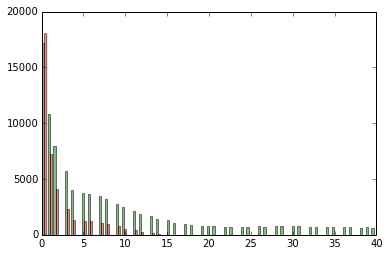

In [10]:
bins=np.linspace(0, 40, 60)
x=female['free']
y=male['free']
data=[x,y]
plt.hist(data, bins, alpha=0.5, color=['g','r'])
#plt.hist(y, bins, alpha=0.5,color='red')
plt.show()

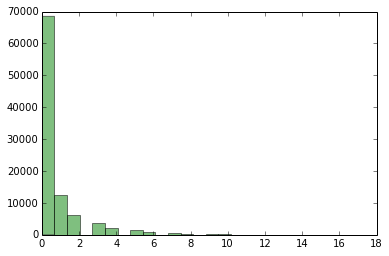

In [11]:
bins=np.linspace(0, 40, 60)
x=female['super']
y=male['super']
plt.hist(x, bins, alpha=0.5,color='green')
plt.show()

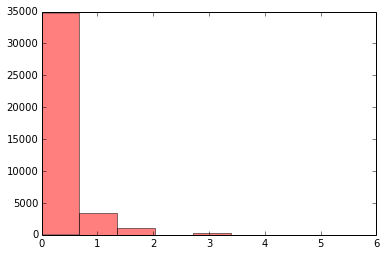

In [12]:
plt.hist(y, bins, alpha=0.5,color='red')
plt.show()

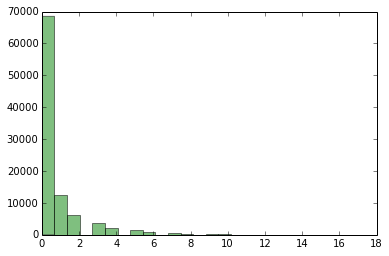

In [13]:
plt.hist(x, bins, alpha=0.5,color='green')
plt.show()

## MACHINE LEARNING & MODELLING

In [14]:
known_values=big_table[big_table.gender!='not_provided']
unknown_values=big_table[big_table.gender=='not_provided']

In [15]:
known_values.head()

,user_id,free,super,gender,source
0,1000001,22.0,0.0,female,invite_a_friend
2,1000003,5.0,0.0,female,google
3,1000004,0.0,1.0,male,article
5,1000006,1.0,0.0,female,google
6,1000007,3.0,0.0,male,article


In [16]:
d = {'male': 0, 'female': 1}
e = {'invite_a_friend': 0, 'google': 1, 'article': 2, 'paid': 3}
known_values['gender']=known_values['gender'].map(d)
known_values['source']=known_values['source'].map(e)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
known_values.head()

,user_id,free,super,gender,source
0,1000001,22.0,0.0,1,0
2,1000003,5.0,0.0,1,1
3,1000004,0.0,1.0,0,2
5,1000006,1.0,0.0,1,1
6,1000007,3.0,0.0,0,2


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
y=known_values['gender']
x=known_values[['free','super','source']]
model = RandomForestClassifier(n_estimators=100)
model = model.fit(x, y)

In [20]:
unknown_values['gender']=unknown_values['gender'].map(d)
unknown_values['source']=unknown_values['source'].map(e)
unknown_values.head()

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,free,super,gender,source
1,1000002,42.0,2.0,NaN,0
4,1000005,5.0,1.0,NaN,0
10,1000011,5.0,1.0,NaN,0
13,1000014,0.0,0.0,NaN,0
16,1000017,11.0,0.0,NaN,0


In [21]:
print(model.predict([[0,3,2]]))

[1]


## VALIDATION

In [26]:
miniset=known_values[:500]

In [27]:
gender_predictions=[]
for index, row in miniset.iterrows():
    gender_predictions.append(int(model.predict([[int(row['free']),int(row['super']),int(row['source'])]])))

In [28]:
gender_values=list(known_values.gender)

In [29]:
right=0
wrong=0
it=0
for i in gender_predictions:
    if gender_predictions[it]==gender_values[it]:
        right+=1
    else:
        wrong+=1
    it+=1
print(right,wrong)

344 156


## CLASSIFICATION

In [22]:
miniset=unknown_values[:500]

In [23]:
miniset

,user_id,free,super,gender,source
1,1000002,42.0,2.0,NaN,0
4,1000005,5.0,1.0,NaN,0
10,1000011,5.0,1.0,NaN,0
13,1000014,0.0,0.0,NaN,0
16,1000017,11.0,0.0,NaN,0
21,1000022,16.0,0.0,NaN,0
26,1000027,15.0,0.0,NaN,0
27,1000028,20.0,0.0,NaN,0
28,1000029,0.0,0.0,NaN,0
31,1000032,1.0,0.0,NaN,0


In [24]:
gender_predictions=[]
for index, row in miniset.iterrows():
    gender_predictions.append(int(model.predict([[int(row['free']),int(row['super']),int(row['source'])]])))

In [25]:
gender_predictions.count(1)

449